In [60]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
sns.set_theme()

# Load data (city)
df = pd.read_csv('../data/GlobalLandTemperaturesByCity.csv')
df['dt'] = pd.DatetimeIndex(df['dt'])
df['Year'] = pd.DatetimeIndex(df['dt']).year
df = df[df['Year'] != 1743]
df = df[df['Year'] != 2013]

# For each country average all AverageTemperature values and add iso_alpha to countries
df_avg = pd.DataFrame({'AverageTemperature': df.groupby('Country')['AverageTemperature'].mean(), 'Country': df.groupby('Country')['Country'].first()})
df_avg = df_avg.reset_index(drop=True)
#print('Average country temperature df: ', df_avg)

df_avg_city = pd.DataFrame({'AverageTemperature': df.groupby('City')['AverageTemperature'].mean(), 'City': df.groupby('City')['City'].first()})
df_avg_city = df_avg_city.reset_index(drop=True)
#print('\n \n Average city temperature df: ', df_avg_city)

# For each Country for each Year average all AverageTemperature values
D1 = df.groupby(['Year', 'Country'])['AverageTemperature'].mean().reset_index()
meantemp = D1.groupby('Year')['AverageTemperature'].mean().reset_index() # Rough - er ren average.
meantemp1900 = meantemp[156:] # 1900-2012

# Normalize temperature relative to median
mediantemp = D1.groupby('Country')['AverageTemperature'].median()
df.groupby(['Year','Country'])['AverageTemperature'].mean().reset_index()['AverageTemperature']
#temp.columns = ['Year', 'Country', 'mean','median']
#D1['NormalizedTemperature'] = temp['mean'] - temp['median']
df

import copy
D2 = copy.deepcopy(D1)
normies = np.array([])
for country in D2['Country'].unique():
    norm = np.array(D2.groupby('Country')['AverageTemperature'].get_group(country) - D2.groupby('Country')['AverageTemperature'].get_group(country).median())
    normies = np.append(normies, norm)
D2['NormalizedTemperature'] = normies


                               SARIMAX Results                                
Dep. Variable:     AverageTemperature   No. Observations:                  113
Model:                 ARIMA(2, 1, 2)   Log Likelihood                  40.562
Date:                Wed, 04 May 2022   AIC                            -71.123
Time:                        14:51:00   BIC                            -57.531
Sample:                             0   HQIC                           -65.608
                                - 113                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5687      0.656     -0.866      0.386      -1.855       0.718
ar.L2          0.1385      0.172      0.805      0.421      -0.199       0.476
ma.L1         -0.0330      0.647     -0.051      0.9

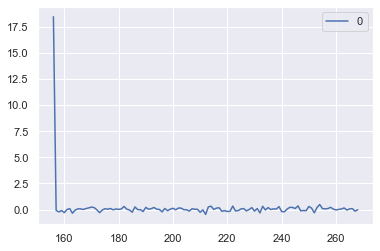

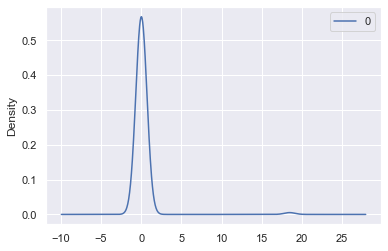

In [65]:
# fit an ARIMA model and plot residual error

# fit model
modeltype = ARIMA(meantemp1900.AverageTemperature, order=(2,1,2))
model = modeltype.fit()
# summary of fit model
print(model.summary())
# line plot of residuals
residuals = pd.DataFrame(model.resid)
residuals.plot()

# # density plot of residuals
residuals.plot(kind='kde')
# # summary stats of residuals
print(residuals.describe())

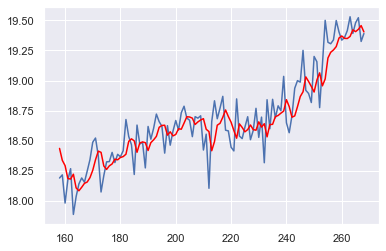

In [64]:
plt.plot(meantemp1900.AverageTemperature[2:])
plt.plot(model.fittedvalues[2:], color='red')
